## Analyse Hauptnutzfläche

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import dataset.importer as im

df = im.get_dataset('dataset/dataset.csv')
filtered_df = im.select_relevant_features(df)


### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.

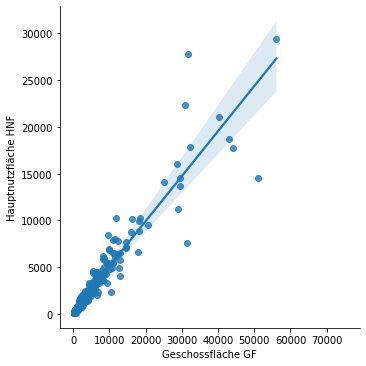

In [61]:
gf = sns.lmplot(
    data=filtered_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')

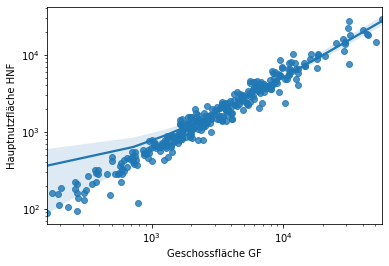

In [60]:
# TODO: duplicated code. Reuse
gf = sns.regplot(
    data=filtered_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')

gf.set_xscale('log')
gf.set_yscale('log')

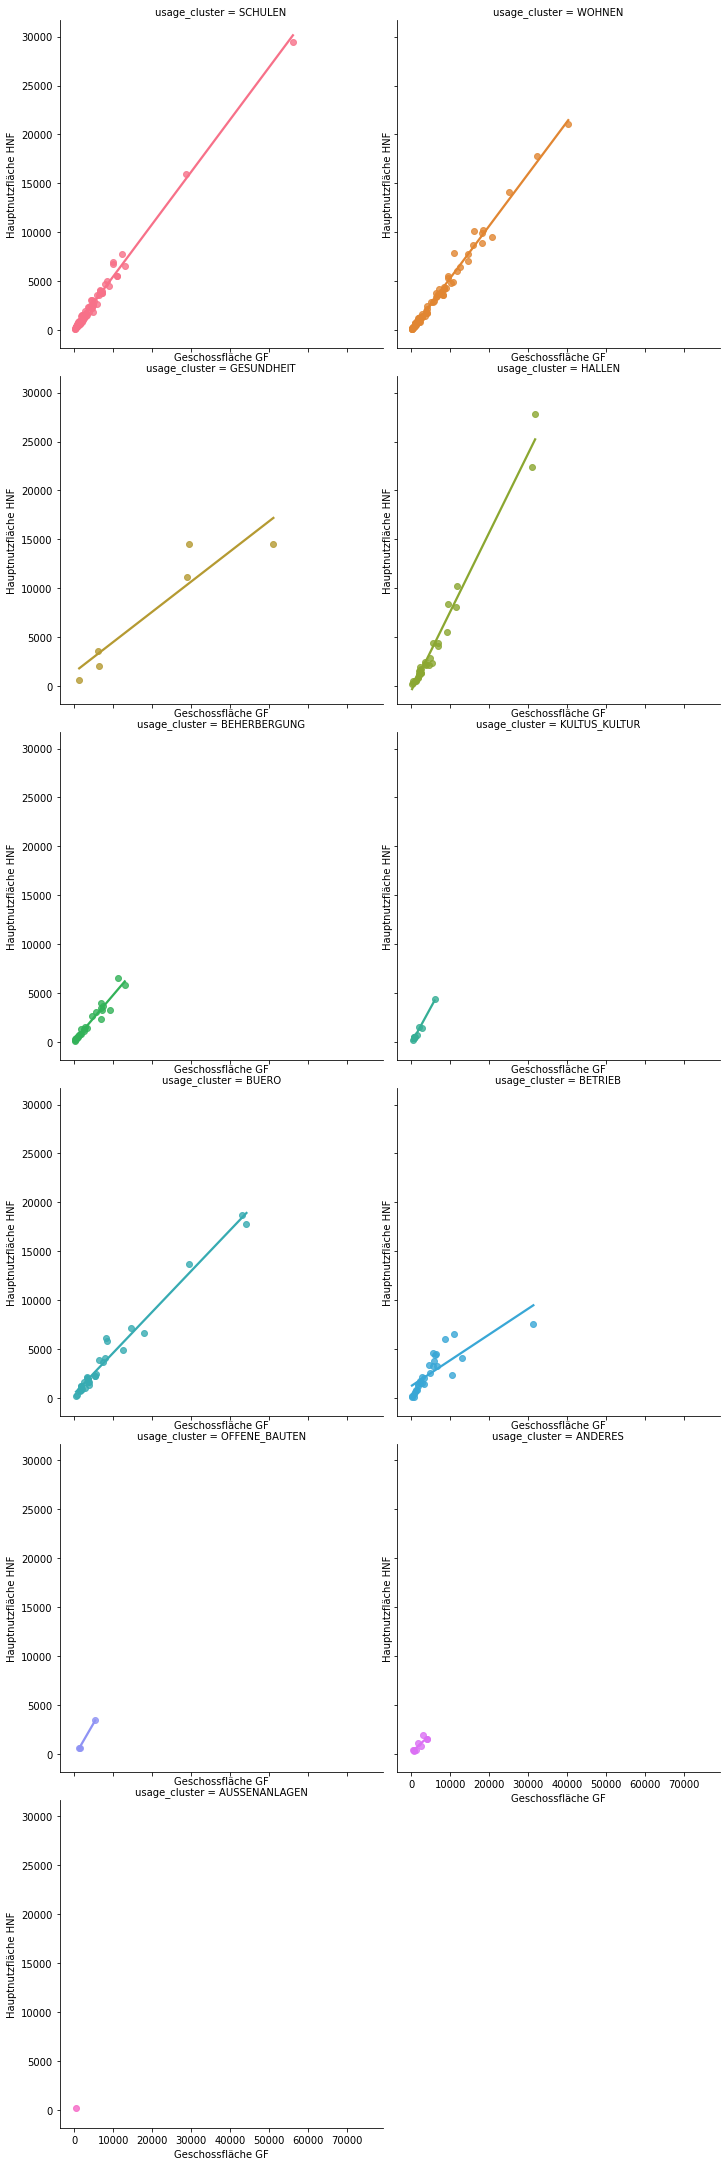

In [62]:
# TODO: scale columns
gf = sns.lmplot(
    data=filtered_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE,
    col=im.FIELD_USAGE_CLUSTER,
    hue=im.FIELD_USAGE_CLUSTER,
    ci=None, col_wrap=2,
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')